In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time
import pandas as pd
import matplotlib.cm as cm

In [2]:
# D: bond dimension, step_list: RG step of TRG.
D_list = [32,40,48,56,64,72,80,88,96]
step_list = np.arange(4,21,1)

## Let's look at the elements of the three-leg fixed-point tensor $S^*$
The preprocessed tensors are stored in the directory "/Gauge-fixed_S". 

If you like to compute them from the beginning, you can do it by using "Data_collection.ipynb".

We can observe that the elements are zero if the corresponding OPE are zeros.

(The sign comes from the arbitrariness of the phase of eigenstates in numerical simulations.)

In [3]:
D = D_list[-1]
step = 20

S = np.load("Gauge-fixed_S/S_D_{}_step_{}.npy".format(D,step))
for i in range(3):
    for j in range(3):
        for k in range(3):          
            print(i,j,k,"\t",np.round(S[i,j,k],4))

0 0 0 	 1.0
0 0 1 	 0.0
0 0 2 	 0.0072
0 1 0 	 0.0
0 1 1 	 0.8148
0 1 2 	 -0.0
0 2 0 	 -0.0079
0 2 1 	 0.0
0 2 2 	 -0.2081
1 0 0 	 0.0
1 0 1 	 0.8148
1 0 2 	 -0.0
1 1 0 	 0.7446
1 1 1 	 -0.0
1 1 2 	 -0.2408
1 2 0 	 0.0
1 2 1 	 0.1271
1 2 2 	 0.0
2 0 0 	 -0.0079
2 0 1 	 0.0
2 0 2 	 -0.2081
2 1 0 	 0.0
2 1 1 	 0.1271
2 1 2 	 0.0
2 2 0 	 0.1039
2 2 1 	 -0.0
2 2 2 	 0.0005


# OPE coefficients
We can compute the Jacobian $x$ from 
## $$S_{ijk}=C_{ijk}l^{\Delta_i+\Delta_j+\Delta_k}2^{\Delta_k},$$
where $l= \frac{1}{\sqrt{2}x}$.

In [4]:
#Scaling dimension　（1, σ, ε)
xn = np.array([0,1/8,1])

# Compute the Jacobian x from (i,j,k) = (ε,ε,1)
l = S[2,2,0]**0.5
print(l)
print("Characteristic scale x:\t",1/np.sqrt(2)/l)
print("e^{π/4} :\t\t", np.exp(np.pi/4))

0.32240034536257417
Characteristic scale x:	 2.1932568973874056
e^{π/4} :		 2.1932800507380152


\
\
Given $x=e^{\pi/4}$, we can compute the OPE coefficients
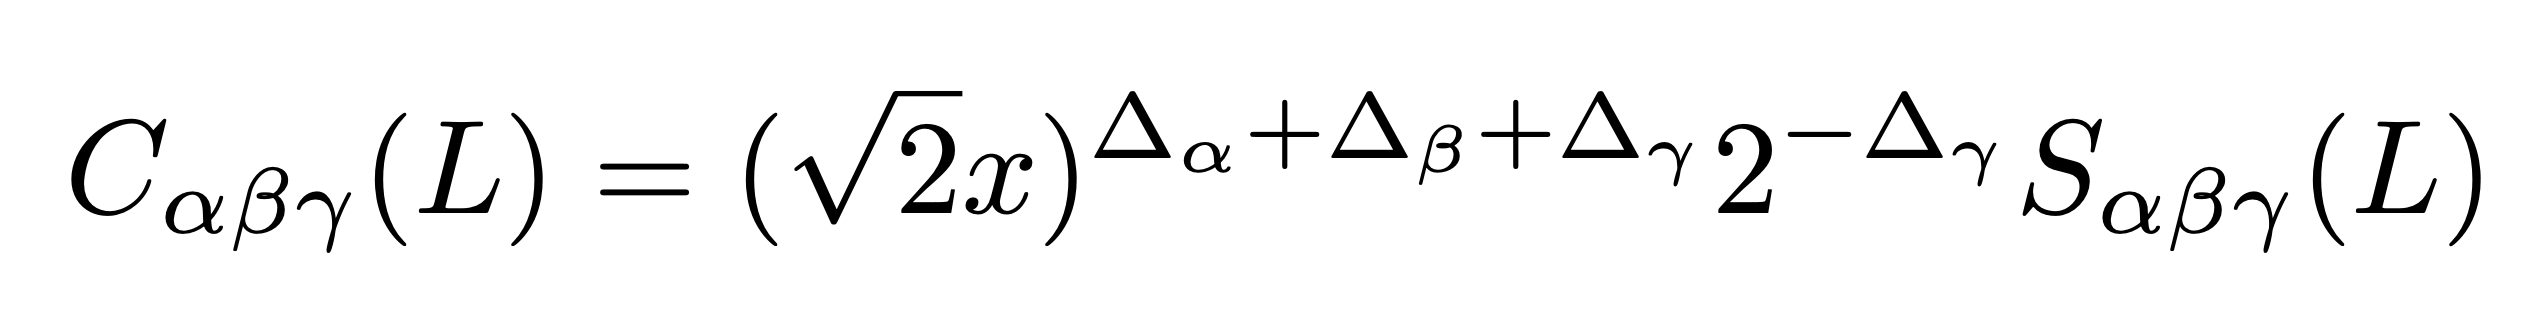

In [5]:
#OPE coefficients

count = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            c = np.real(S[i,j,k]/l**(xn[i]+xn[j]+xn[k])/2**xn[k])
            if np.abs(c)>0.2:
                print(i,j,k,"\t",abs(np.round(c,2)))
                count += 1
print("# of the non-zero combinations: ", count)

0 0 0 	 1.0
0 1 1 	 0.99
0 2 2 	 1.0
1 0 1 	 0.99
1 1 0 	 0.99
1 1 2 	 0.5
1 2 1 	 0.48
2 0 2 	 1.0
2 1 1 	 0.48
2 2 0 	 1.0
# of the non-zero combinations:  10


## Finite-size effect of $x$

To investigate the jacobian for different models, we define the "finite-size" $x$ as
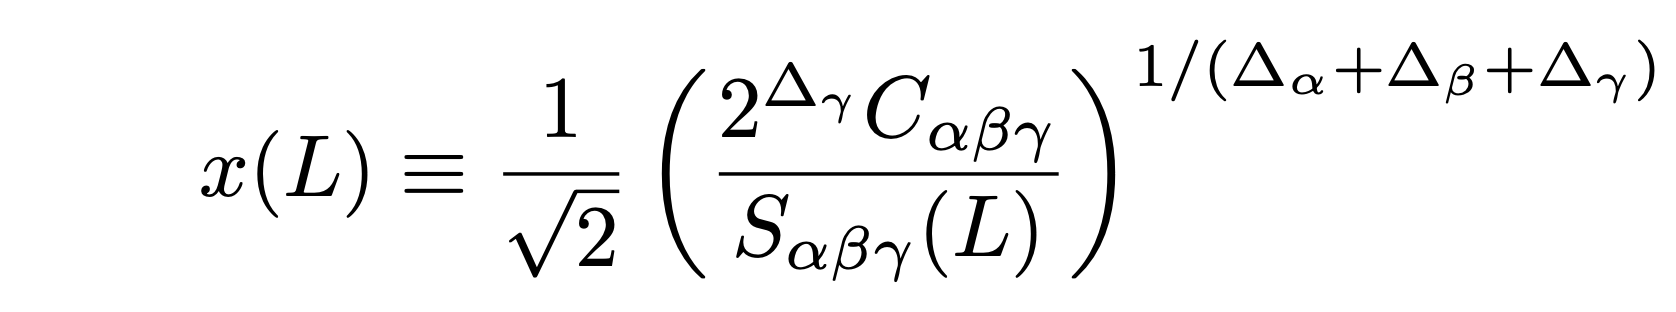

In [6]:
L_list = 2*np.sqrt(2)**step_list
x_list = []
x_list_ep = []
for D in D_list:
    tmp = []
    tmp_ep = []
    for i in step_list:
        S = np.load("Gauge-fixed_S/S_D_{}_step_{}.npy".format(D,i))
        l = S[1,1,0]**4
        l_ep = S[2,2,0]**0.5
        
        tmp.append(1/np.sqrt(2)/l)
        tmp_ep.append(1/np.sqrt(2)/l_ep)
    x_list.append(tmp)
    x_list_ep.append(tmp_ep)
x_list = np.array(x_list)
x_list_ep = np.array(x_list_ep)
x_list_potts = np.load("Potts_x.npy")

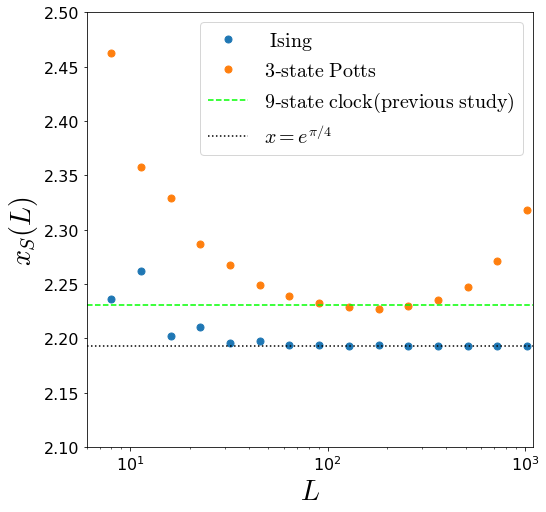

In [7]:
plt.figure(figsize=(8,8))

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

plt.ylim(2.1,2.5)
plt.rcParams["font.family"] = "Times New Roman"
plt.plot(L_list, x_list_ep[-1],".",label = r"$\rm{\ Ising}$",markersize=14)
plt.plot(L_list, x_list_potts[-1],".",label= r"$\rm{3}$"+"-"+r"$\rm{state\ Potts}$",markersize=14)
plt.axhline(2.23035,linestyle="--",label=r"$\rm{9}$"+"-"+r"$\rm{state\ clock (previous\ study)}$",color="lime")
plt.axhline(np.exp(np.pi/4),linestyle=":",label=r"$x=e^{\pi/4}$",color="black")
plt.legend(fontsize=20,loc="upper right")
plt.xlabel(r"$L$",fontsize=28)
plt.ylabel(r"$x_S(L)$",fontsize=28)
plt.xscale("log")
plt.xlim(6,1100)
plt.savefig("x_fs.png",bbox_inches="tight", pad_inches=0.05)

The Ising model is perfectly consistent with the theoretical prediction $x=e^{\pi/4}$, while the 3-state Potts and 9-state clock models seem to suffer from finite-$D$ effects of TRG/TNR. 
(https://arxiv.org/abs/2302.06632)

In [8]:
def cal_OPE(S,xn,l,D,step_list,m,n,o):
    c = []
    for i in step_list:
        S = np.load("Gauge-fixed_S/S_D_{}_step_{}.npy".format(D,i))
        c.append(np.abs(S[m,n,o]/l**(xn[m]+xn[n]+xn[o])/2**xn[o]))
    return np.array(c)

def Ising_OPE(m,n,o):
    co = np.sort([m,n,o])
    co = list(co)
    if co==[0,0,0] or co==[0,1,1] or co==[0,2,2]:
        return 1
    elif co==[1,1,2]:
        return 0.5
    else:
        return 0

def label_c(m,n,o):
    arr = ["1","σ","ε"]
    str_c = "$C_{"
    str_c += arr[m]+arr[n]+arr[o]
    str_c += "}(L)$"
    return str_c

D = D_list[-1]
#l = 1/np.sqrt(2)/2.1934
l = 1/np.sqrt(2)/np.exp(np.pi/4)

OPE_coeff = np.zeros((3,3,3,len(L_list)))
delta_C = np.zeros((3,3,3,len(L_list)))
for i in range(3):
    for j in range(3):
        for k in range(3):
            OPE_coeff[i,j,k] = cal_OPE(S,xn,l,D,step_list,i,j,k)
            delta_C[i,j,k] = np.abs(Ising_OPE(i,j,k)-OPE_coeff[i,j,k])

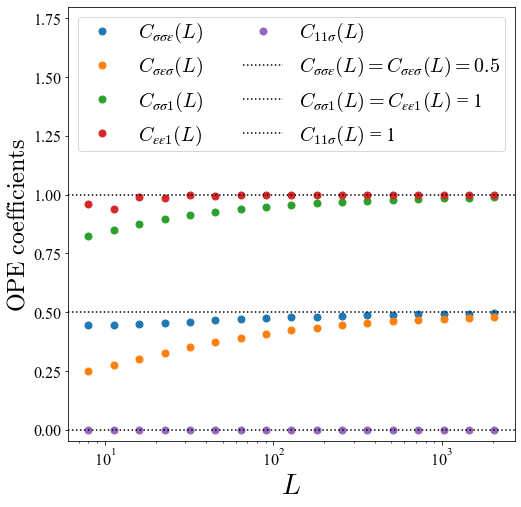

In [9]:
plt.figure(figsize=(8,8))
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

for ind in [[1,1,2],[1,2,1],[1,1,0],[2,2,0],[0,0,1]]:
    i,j,k = ind
    plt.plot(L_list, OPE_coeff[i,j,k],".",label = label_c(i,j,k),markersize=14)

plt.ylim(-0.05,1.8)
plt.axhline(0.5,linestyle=":",label="$C_{σσε}(L) = C_{σεσ}(L)=0.5$",color="black")
plt.axhline(1,linestyle=":",label="$C_{σσ1}(L)=C_{εε1}(L)$ = 1",color="black")
plt.axhline(0,linestyle=":",label="$C_{11σ}(L)$ = 1",color="black")
plt.legend(borderpad=0.2,fontsize=20,ncol = 2)
plt.xlabel(r"$L$",fontsize=28)
plt.ylabel(r"$\rm{OPE\ coefficients}$",fontsize=24)
plt.xscale("log")
plt.savefig("OPE_Ising.png",bbox_inches="tight", pad_inches=0.05)

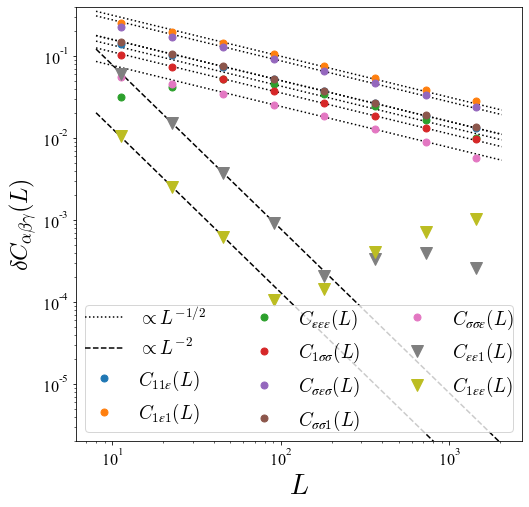

In [10]:
plt.figure(figsize=(8,8))
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

fit_d = 7
for ind in [[0,0,2],[0,2,0],[2,2,2],[0,1,1],[1,2,1],[1,1,0],[1,1,2]]:
    i,j,k = ind
    plt.plot(L_list,delta_C[i,j,k,fit_d]*(L_list/L_list[fit_d])**(-1/2),":",color="black",label="$\propto L^{-1/2}$" if ind == [0,0,2] else "")
    
fit_d = 3  
for ind in [[2,2,0],[0,2,2]]:
    i,j,k = ind
    plt.plot(L_list,delta_C[i,j,k,fit_d]*(L_list/L_list[fit_d])**(-2),"--",color="black",label="$\propto L^{-2}$" if ind == [2,2,0] else "")


for ind in [[0,0,2],[0,2,0],[2,2,2],[0,1,1],[1,2,1],[1,1,0],[1,1,2]]:
    i,j,k = ind
    plt.plot(L_list[1::2], delta_C[i,j,k][1::2],".",label = label_c(i,j,k),markersize=14)
    


for ind in [[2,2,0],[0,2,2]]:
    i,j,k = ind
    plt.plot(L_list[1::2], delta_C[i,j,k][1::2],"v",label = label_c(i,j,k),markersize=12)
    
plt.legend(borderpad=0.,fontsize=19,ncol = 3,loc="lower left")
plt.xlabel(r"$L$",fontsize=28)
plt.ylabel(r"$\delta C_{\alpha\beta\gamma}(L)$",fontsize=24)
plt.xscale("log")
plt.yscale("log")
plt.ylim(2e-6,0.4)
plt.savefig("finite-size_ope.png",bbox_inches="tight", pad_inches=0.05)

## Computer the fixed-point tensor

The gauge-fixed four-leg FP tensors $T^*$ are stored in "\fptensor".

In [11]:
D = D_list[-1]
step = 20
fp = np.load("fptensor/Ising_D_{}_step_{}.npy".format(D,step))
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                print(i,j,k,l,"\t",np.round(fp[i,j,k,l],3))

0 0 0 0 	 1.0
0 0 0 1 	 0.0
0 0 0 2 	 0.023
0 0 1 0 	 0.0
0 0 1 1 	 0.708
0 0 1 2 	 -0.0
0 0 2 0 	 0.023
0 0 2 1 	 -0.0
0 0 2 2 	 0.086
0 1 0 0 	 0.0
0 1 0 1 	 0.639
0 1 0 2 	 -0.0
0 1 1 0 	 0.708
0 1 1 1 	 -0.0
0 1 1 2 	 -0.062
0 1 2 0 	 -0.0
0 1 2 1 	 -0.133
0 1 2 2 	 0.0
0 2 0 0 	 0.023
0 2 0 1 	 -0.0
0 2 0 2 	 0.044
0 2 1 0 	 -0.0
0 2 1 1 	 -0.062
0 2 1 2 	 -0.0
0 2 2 0 	 0.086
0 2 2 1 	 0.0
0 2 2 2 	 0.001
1 0 0 0 	 0.0
1 0 0 1 	 0.708
1 0 0 2 	 -0.0
1 0 1 0 	 0.639
1 0 1 1 	 -0.0
1 0 1 2 	 -0.133
1 0 2 0 	 -0.0
1 0 2 1 	 -0.062
1 0 2 2 	 0.0
1 1 0 0 	 0.708
1 1 0 1 	 -0.0
1 1 0 2 	 -0.062
1 1 1 0 	 -0.0
1 1 1 1 	 0.61
1 1 1 2 	 0.0
1 1 2 0 	 -0.062
1 1 2 1 	 0.0
1 1 2 2 	 0.071
1 2 0 0 	 -0.0
1 2 0 1 	 -0.062
1 2 0 2 	 -0.0
1 2 1 0 	 -0.133
1 2 1 1 	 0.0
1 2 1 2 	 -0.007
1 2 2 0 	 0.0
1 2 2 1 	 0.071
1 2 2 2 	 -0.0
2 0 0 0 	 0.023
2 0 0 1 	 -0.0
2 0 0 2 	 0.086
2 0 1 0 	 -0.0
2 0 1 1 	 -0.062
2 0 1 2 	 0.0
2 0 2 0 	 0.044
2 0 2 1 	 -0.0
2 0 2 2 	 0.001
2 1 0 0 	 -0.0
2 1 0 1 	 -0



# Define the functions to compute correlation functions from CFT.

In [12]:
# Reference
# https://en.wikipedia.org/wiki/Two-dimensional_critical_Ising_model
def e4(absz,x =1/2):
    prod_z =(absz**6)*(np.sqrt(2)**4*2**2)
    prod_z = prod_z**(-1/3)
    tmp = (1-x+x**2)/(x**(2/3)*(1-x)**(2/3))
    return (prod_z*tmp)**2

def ssee(absz, x=1/2):
    prod_z = (absz)**(1/4-5/8-3/4)*(np.sqrt(2)**(1/4-5/8)*(2*2*np.sqrt(2)**2)**(-3/16))
    tmp  = (1-x/2)/(x**(3/8)*(1-x)**(5/16))
    return (prod_z*tmp)**2

def sese(absz, x=2):
    return 0

def s4(absz, x=1/2):
    prefactor = (2*absz)**(-4*0.125)
    main = (x*(1-x))**(-0.25)
    return prefactor*main

def ope(ind):
    i,j,k= np.sort(ind)
    OPE1 = ([[0,0,0],[0,1,1],[0,2,2]])
    OPE05 = [1,1,2]
    if [i,j,k] in OPE1:
        return 1
    elif [i,j,k]==OPE05:
        return 0.5
    else:
        return 0
    
def three_point(zb,ind,dist):
    x_set = np.array([xn[ind[i]] for i in range(3)])
    delta = np.sum(x_set)
    
    corr = ope(ind)
    for i in range(3):
        z = zb*np.sqrt(2)**dist[i]
        d = delta - 2*x_set[i-1]
        corr /= z**d
    return corr

def two_point(z_dist,op):
    return 1/z_dist**(2*xn[op])

In [13]:
D_list = [80,84,88,92,96]
step_list = np.arange(4,21,1)
L_list = 2*np.sqrt(2)**step_list

fp_list = np.zeros((len(D_list),len(step_list),3,3,3,3))
for i,D in enumerate(D_list):
    for j,step in enumerate(step_list):
        fp_list[i,j] = np.load("fptensor/Ising_D_{}_step_{}.npy".format(D,step))

In [14]:
xn

array([0.   , 0.125, 1.   ])

In [15]:
fp_list.shape

(5, 17, 3, 3, 3, 3)

In [16]:
x = 0.5
zb = np.exp(np.pi/2)/2
d = -1
step = -1
fp = fp_list[d,step]

Label_list = ["σ4","σ2ε2","σεσε","ε4","σσε1","σεσ1","σσσ1","εεε1","σσ11","σ1σ1","εε11","ε1ε1","σε11"]
Exact_value = [s4(zb,x),ssee(zb,x),sese(zb,x),e4(zb,x),three_point(zb,[1,1,2],[1,1,2]),
               three_point(zb,[1,2,1],[1,1,2]),0,0,two_point(zb*np.sqrt(2),1),
               two_point(zb*2,1),two_point(zb*np.sqrt(2),2),two_point(zb*2,2),0]

Numerical_value = [fp[1,1,1,1],fp[1,1,2,2],fp[1,2,1,2],fp[2,2,2,2]
                  ,fp[1,1,2,0],fp[1,2,1,0],fp[1,1,1,0],fp[2,2,2,0]
                  ,fp[1,1,0,0],fp[1,0,1,0],fp[2,2,0,0],fp[2,0,2,0]
                   ,fp[1,2,0,0]]
df = pd.DataFrame(np.abs([np.round(Numerical_value,4),np.round(Exact_value,4)]),columns=Label_list,index=["Numerical value","Four-point funciont"])

In [17]:
df.T

,Numerical value,Four-point funciont
σ4,0.6097,0.6448
σ2ε2,0.0714,0.0716
σεσε,0.0068,0.0000
ε4,0.0168,0.0168
σσε1,0.0618,0.0765
σεσ1,0.1332,0.1404
σσσ1,0.0000,0.0000
εεε1,0.0008,0.0000
σσ11,0.7082,0.7363
σ1σ1,0.6387,0.6752


D list:  [84, 88, 92, 96]


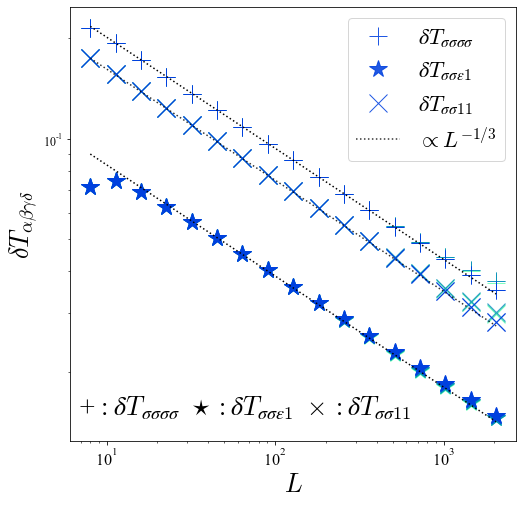

In [18]:
plt.figure(figsize=(8,8))
zb=np.exp(np.pi/2)/2
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12
cutoff = 1

ssss = s4(zb,1/2)-fp_list[:,:,1,1,1,1]
ss=two_point(zb*np.sqrt(2),1)-fp_list[:,:,1,1,0,0]
sse=three_point(zb,[1,1,2],[1,1,2])-np.abs(fp_list[:,:,1,1,2,0])

scale_list = []
print("D list: ",D_list[cutoff:])
for i in range(cutoff,len(D_list)):
    scale = (len(D_list)-i)/(len(D_list)-cutoff)
    alpha = (1-scale)*0.5+0.5
    plt.plot(L_list,ssss[i],"+",markersize=18,color=cm.winter(scale),alpha=alpha)
    plt.plot(L_list,ss[i],"x",markersize=18,color=cm.winter(scale),alpha=alpha)
    plt.plot(L_list,sse[i],"*",markersize=18,color=cm.winter(scale),alpha=alpha)
    scale_list.append(scale)
    if D_list[i] == D_list[-1]:
        plt.plot(L_list,ssss[i],"+",label=r"$δT_{σσσσ}$",markersize=18,color=cm.winter(scale),alpha=alpha)
        plt.plot(L_list,sse[i],"*",label=r"$δT_{σσε1}$",markersize=18,color=cm.winter(scale),alpha=alpha)
        plt.plot(L_list,ss[i],"x",label=r"$δT_{σσ11}$",markersize=18,color=cm.winter(scale),alpha=alpha)

plt.plot(L_list,ss[-1,0]*(L_list[0]/L_list)**(1/3),":",color="black",label=r"$\propto L^{-1/3}$",alpha=0.8)
plt.plot(L_list,sse[-1,5]*(L_list[5]/L_list)**(1/3),":",color="black")
plt.plot(L_list,ssss[-1,3]*(L_list[3]/L_list)**(1/3),":",color="black")

plt.xscale("log") 
plt.yscale("log")
plt.xlabel(r"$L$",fontsize=26)
plt.ylabel(r"$\delta T_{\alpha\beta\gamma\delta}$",fontsize=26)
plt.legend(fontsize=22)
plt.annotate(r"+ : $δT_{σσσσ}\ \star: δT_{σσε1} \ \times: δT_{σσ11}$", xy=(0.02, 0.06), xycoords='axes fraction',fontsize=26)
plt.savefig("4-point_fs.png",bbox_inches="tight", pad_inches=0.05)

D list:  [88, 92, 96]


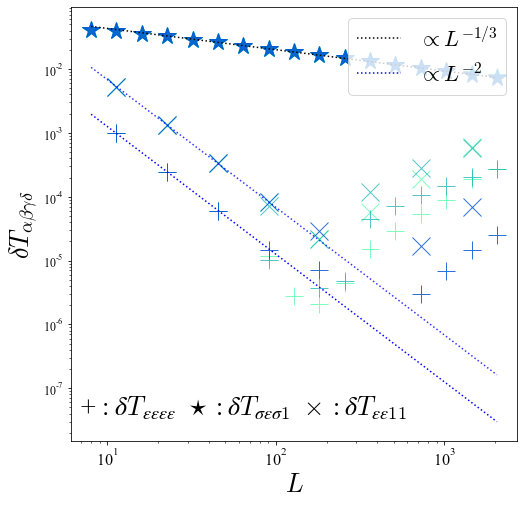

In [19]:
plt.figure(figsize=(8,8))
zb=np.exp(np.pi/2)/2
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12
cutoff = 2

eeee = e4(zb,1/2)-fp_list[:,:,2,2,2,2]
ee=two_point(zb*np.sqrt(2),2)-fp_list[:,:,2,2,0,0]
ses=three_point(zb,[1,2,1],[1,1,2])-np.abs(fp_list[:,:,1,2,1,0])

scale_list = []
print("D list: ",D_list[cutoff:])
for i in range(cutoff,len(D_list)):
    scale = (len(D_list)-i)/(len(D_list)-cutoff)
    alpha = (1-scale)*0.5+0.5
    plt.plot(L_list,eeee[i],"+",markersize=18,color=cm.winter(scale),alpha=alpha)
    plt.plot(L_list[1::2],ee[i,1::2],"x",markersize=18,color=cm.winter(scale),alpha=alpha)
    plt.plot(L_list,ses[i],"*",markersize=18,color=cm.winter(scale),alpha=alpha)
    scale_list.append(scale)

plt.plot(L_list,ee[-1,1]*(L_list[1]/L_list)**(2),":",color="blue",alpha=0.8)
plt.plot(L_list,ses[-1,5]*(L_list[5]/L_list)**(1/3),":",color="black",label=r"$\propto L^{-1/3}$")
plt.plot(L_list,eeee[-1,3]*(L_list[3]/L_list)**(2),":",color="blue",label=r"$\propto L^{-2}$")

plt.xscale("log") 
plt.yscale("log")
plt.xlabel(r"$L$",fontsize=26)
plt.ylabel(r"$\delta T_{\alpha\beta\gamma\delta}$",fontsize=26)
plt.legend(fontsize=22,loc = "upper right")
plt.annotate(r"+ : $δT_{εεεε}\ \star: δT_{σεσ1} \ \times: δT_{εε11}$", xy=(0.02, 0.06), xycoords='axes fraction',fontsize=26)
plt.savefig("4-point_fs_supple.png",bbox_inches="tight", pad_inches=0.05)

## Finite-bond and CDL effects(Numerical errors)

For lower bond dimensions and larger system sizes, the numerical errors amplify.

To employ reliable data, we stopped RG proceduces at $L\sim2048$.

D list:  [80, 84, 88, 92, 96]


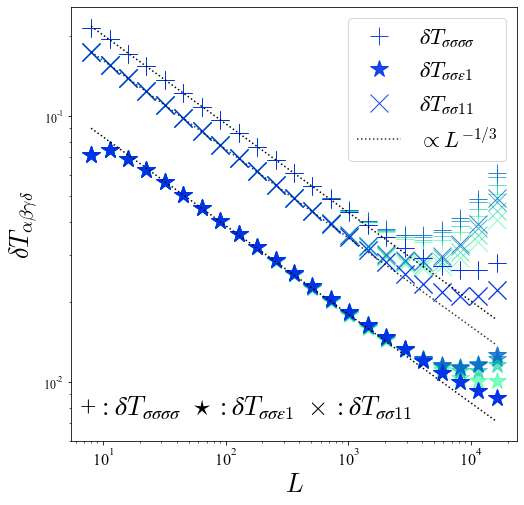

In [20]:
D_list = [80,84,88,92,96]
step_list = np.arange(4,27,1)
L_list = 2*np.sqrt(2)**step_list

fp_list = np.zeros((len(D_list),len(step_list),3,3,3,3))
for i,D in enumerate(D_list):
    for j,step in enumerate(step_list):
        fp_list[i,j] = np.load("fptensor/Ising_D_{}_step_{}.npy".format(D,step))
        
plt.figure(figsize=(8,8))
cutoff = 0
ssss = s4(zb,1/2)-fp_list[:,:,1,1,1,1]
ss=two_point(zb*np.sqrt(2),1)-fp_list[:,:,1,1,0,0]
sse=three_point(zb,[1,1,2],[1,1,2])-np.abs(fp_list[:,:,1,1,2,0])

scale_list = []
print("D list: ",D_list[cutoff:])
for i in range(cutoff,len(D_list)):
    scale = (len(D_list)-i)/(len(D_list)-cutoff)
    alpha = (1-scale)*0.5+0.5
    plt.plot(L_list,ssss[i],"+",markersize=18,color=cm.winter(scale),alpha=alpha)
    plt.plot(L_list,ss[i],"x",markersize=18,color=cm.winter(scale),alpha=alpha)
    plt.plot(L_list,sse[i],"*",markersize=18,color=cm.winter(scale),alpha=alpha)
    scale_list.append(scale)
    if D_list[i] == D_list[-1]:
        plt.plot(L_list,ssss[i],"+",label=r"$δT_{σσσσ}$",markersize=18,color=cm.winter(scale),alpha=alpha)
        plt.plot(L_list,sse[i],"*",label=r"$δT_{σσε1}$",markersize=18,color=cm.winter(scale),alpha=alpha)
        plt.plot(L_list,ss[i],"x",label=r"$δT_{σσ11}$",markersize=18,color=cm.winter(scale),alpha=alpha)

plt.plot(L_list,ss[-1,0]*(L_list[0]/L_list)**(1/3),":",color="black",label=r"$\propto L^{-1/3}$",alpha=0.8)
plt.plot(L_list,sse[-1,5]*(L_list[5]/L_list)**(1/3),":",color="black")
plt.plot(L_list,ssss[-1,3]*(L_list[3]/L_list)**(1/3),":",color="black")

plt.xscale("log") 
plt.yscale("log")
plt.xlabel(r"$L$",fontsize=26)
plt.ylabel(r"$\delta T_{\alpha\beta\gamma\delta}$",fontsize=26)
plt.legend(fontsize=22)
plt.annotate(r"+ : $δT_{σσσσ}\ \star: δT_{σσε1} \ \times: δT_{σσ11}$", xy=(0.02, 0.06), xycoords='axes fraction',fontsize=26)

plt.savefig("4-point_finiteD.png",bbox_inches="tight", pad_inches=0.05)